In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

In [6]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [35]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

array([[  6.29843078, -15.96056386],
       [  4.70922375,   3.78309002],
       [  4.42780671, -10.69598329],
       ...,
       [  5.6932577 ,   0.83918505],
       [  4.46508095,  -2.19040124],
       [  7.31158917, -10.22512104]])

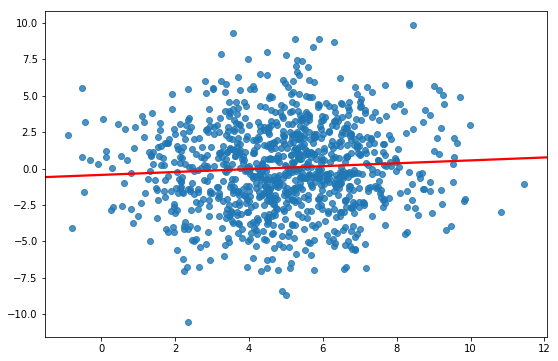

In [56]:
line_kws = {'color':'red'}
sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [52]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))
print('\n=================================\n')
print('Our covariance matrix\n')
print(covariance(X))

covariance matrix from numpy

[[4.18845863 0.12737738]
 [0.12737738 8.46252745]]


Our covariance matrix

[[4.18845863 0.12737738]
 [0.12737738 8.46252745]]


## Correlation

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [53]:
def correlation(X):
    cov = covariance(X)
    std = X.std(axis=0, ddof=1).reshape(-1, 1) @ X.std(axis=0, ddof=1).reshape(1, -1)
    
    return cov / std

### Generating uncorrelated data

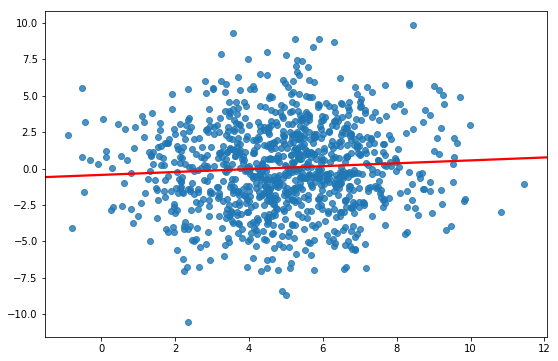

In [55]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)

X = np.vstack((x, y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [59]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[1.         0.06453643]
 [0.06453643 1.        ]]


Our correlation matrix

[[1.         0.06453643]
 [0.06453643 1.        ]]


### Generating correlated data

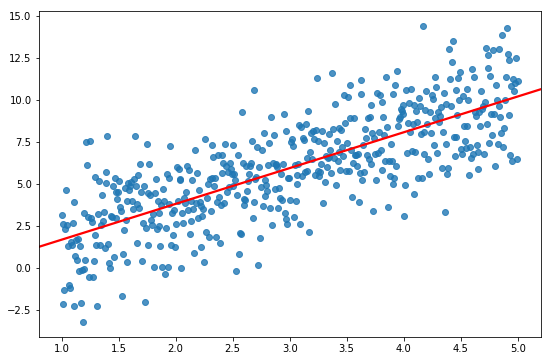

In [64]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [65]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[1.         0.76261992]
 [0.76261992 1.        ]]


Our correlation matrix

[[1.         0.76261992]
 [0.76261992 1.        ]]


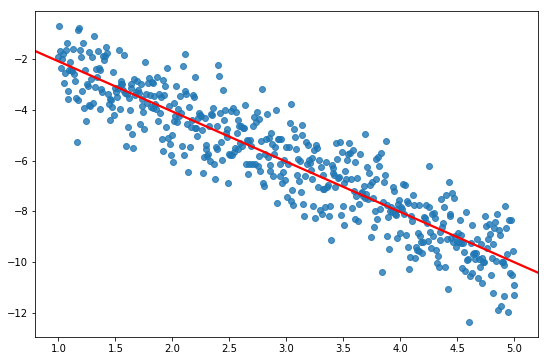

In [68]:
x = np.linspace(1, 5, 500)
y = -2 * x + np.random.normal(scale=1, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [69]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[ 1.        -0.9174633]
 [-0.9174633  1.       ]]


Our correlation matrix

[[ 1.        -0.9174633]
 [-0.9174633  1.       ]]


### Correlation for a 3x3 matrix

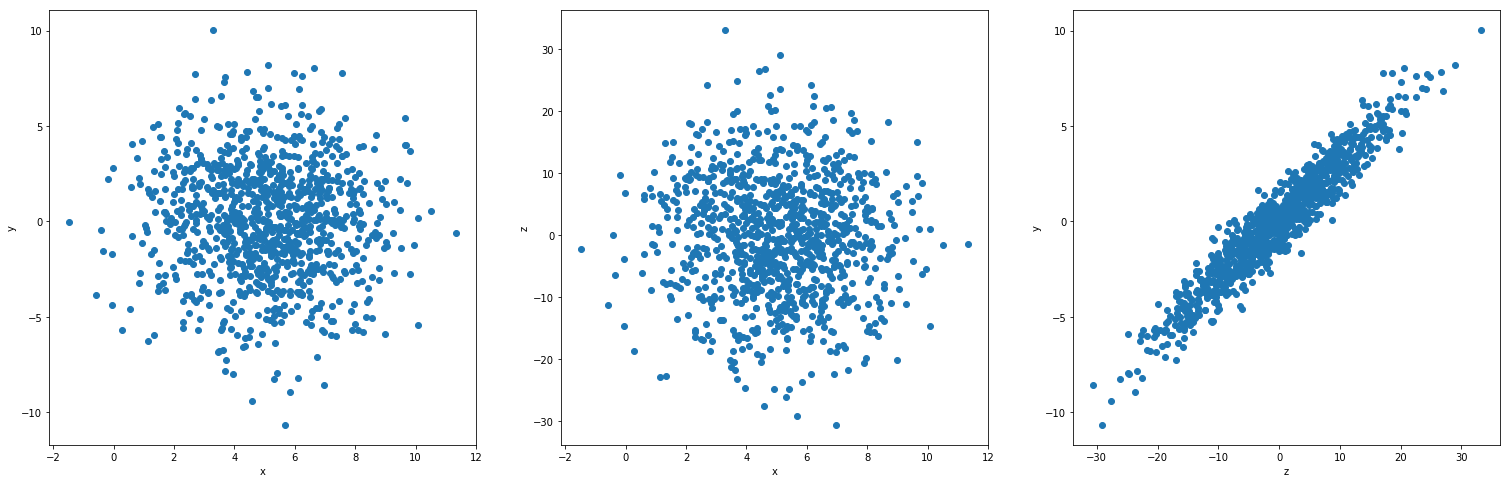

In [81]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)
z = 3 * y + np.random.normal(scale=3, size=1000)

X = np.vstack((x, y, z)).T

fig, axes = plt.subplots(ncols=3, figsize=(26,8))

axes[0].scatter(x, y)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].scatter(x, z)
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

axes[2].scatter(z, y)
axes[2].set_xlabel('z')
axes[2].set_ylabel('y');


In [82]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[ 1.         -0.03801574 -0.04510553]
 [-0.03801574  1.          0.95441474]
 [-0.04510553  0.95441474  1.        ]]


Our correlation matrix

[[ 1.         -0.03801574 -0.04510553]
 [-0.03801574  1.          0.95441474]
 [-0.04510553  0.95441474  1.        ]]
